<a href="https://colab.research.google.com/github/grizzler88/Springboard/blob/master/Capstone%20-%20Craft%20Beer/CraftBeer_02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 3: Craft Beer Recommendation 

#Exploratory Data Analysis (Part 2) 

## Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
reviews = pd.read_csv('beer_reviews_cleaned.csv', keep_default_na=False)

In [3]:
#df.head()

In [4]:
reviews.drop(columns='Unnamed: 0', inplace=True)

## Explore Reviews

Before bringing our data up to beer-level (which is focus of this analysis), we want to explore the data at it's lowest level in the review dataset to see if we can uncover any interesting nuggets that can be used when grouping data.

The majority of this EDA is done at Tableau and be accessed at the link below:

https://public.tableau.com/profile/rory.breslin#!/vizhome/CraftBeerDataset-ReviewsSummary/CraftBeerReviews 

However, in the below sections we will review the distribution of the data and take a look at the review metrics. We will also apply a bootstrap distribution to the overall review score to find the confidence interval for the mean, and apply a correlation heatmp to the data to see how our numerical variables correlated with each other. These are two examples of analysis that are required outside of Tableau. This EDA aims to show how both Python and Tableau tools can be used together to create a comprehensive analysis to our problem.

### Simple Review of Data

First, we will look at shape and columns of data, as well as checking to see if null values are present (they are not as we dealt with this issue in Data Wrangling stage).

We also look at the data types in data set and summary of the statistical information of our nummeric variables.

In [5]:
#reviews.head()

In [6]:
#reviews.isnull().sum()

In [7]:
#reviews.dtypes

In [8]:
reviews.describe()

,brewery_id,beer_id,beer_abv,review_overall,review_appearance,review_aroma,review_palate,review_taste,brewery_bar,brewery_beertogo,brewery_brewery,brewery_eatery,brewery_homebrew,brewery_store,brewery_na
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1586614.0,1.586614e+06
mean,3.130099e+03,2.171279e+04,6.997913e+00,3.815581e+00,3.841642e+00,3.735636e+00,3.743701e+00,3.792860e+00,5.240247e-01,4.107741e-01,8.652709e-01,3.525432e-01,6.177936e-03,0.0,1.347278e-01
std,5.578104e+03,2.181834e+04,2.300556e+00,7.206219e-01,6.160928e-01,6.976167e-01,6.822184e-01,7.319696e-01,4.994226e-01,4.919745e-01,3.414340e-01,4.777621e-01,7.835670e-02,0.0,3.414327e-01
min,1.000000e+00,3.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,1.430000e+02,1.717000e+03,5.200000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,4.290000e+02,1.390600e+04,6.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
75%,2.372000e+03,3.944100e+04,8.500000e+00,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00
max,2.800300e+04,7.731700e+04,5.770000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00


In [9]:
#reviews.brewery_beertogo.value_counts()

### Review Scores

Gaining a better understanding of our review scores are going to be the main focus of our analysis. The next few sections will look at this data in several different ways.

For clarity, the review scores in the dataset are:
* review_overall - Overall score for the beer
* review_appearance - Score for the appearance of the beer
* review_aroma - Score for the smell or aromoa of the beer
* review_palate - Score for the feel of the beer when drinking
* review_taste - Score for the taste of the beer when drinking

For more infomration on how beers are reviewed, this link is a useful resource: https://www.beeradvocate.com/community/threads/how-to-review-a-beer.241156/ 

### Counts and Scoring Values

The review scoring data in the dataset appears to be in 0.5 increments ranging from 0 to 5.

Overall and Appearance have 10 unique scoring values (with both having 7 0 scores) where as the Aroma, Palate, and Taste have 9 unique scoring values. For some reason there is no 0.5 score present across all review scores and majority of reviewers tend to begin their scale at 1.

Further review of the Beer Advocate review guide tells us that beer scores can be broken down by the following:

* 4.50 - 5.00 = World-Class
* 4.00 - 4.49 = Outstanding
* 3.75 - 3.99 = Very Good
* 3.50 - 3.74 = Good
* 3.00 - 3.49 = Okay
* 2.00 - 2.99 = Poor
* 1.00 - 1.99 = Awful

In [10]:
reviews.review_overall.value_counts().sort_index(ascending=False)
#reviews.review_appearance.value_counts().sort_index(ascending=False)
#reviews.review_aroma.value_counts().sort_index(ascending=False)
#reviews.review_palate.value_counts().sort_index(ascending=False)
#reviews.review_taste.value_counts().sort_index(ascending=False)

5.0     91320
4.5    324385
4.0    582764
3.5    301817
3.0    165644
2.5     58523
2.0     38225
1.5     12975
1.0     10954
0.0         7
Name: review_overall, dtype: int64

In [11]:
print('Unique Values - Overall: ', reviews.review_overall.nunique())
print('Unique Values - Appearance: ', reviews.review_appearance.nunique())
print('Unique Values - Aroma: ', reviews.review_aroma.nunique())
print('Unique Values - Palate: ', reviews.review_palate.nunique())
print('Unique Values - Taste: ', reviews.review_taste.nunique())

Unique Values - Overall:  10
Unique Values - Appearance:  10
Unique Values - Aroma:  9
Unique Values - Palate:  9
Unique Values - Taste:  9


### Histograms

A better way to display the scoring counts is by using Historgrams. Based on the information above regarding the unique scoring values, we created bins for each value and plotted these for each score.

The results show a distribution with a left-tail - where reviews tend to get higher scores. This distribution prevails for all scores, however there are slight variations between each score that will be interesting to explore as we continue with this analysis.

In [12]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

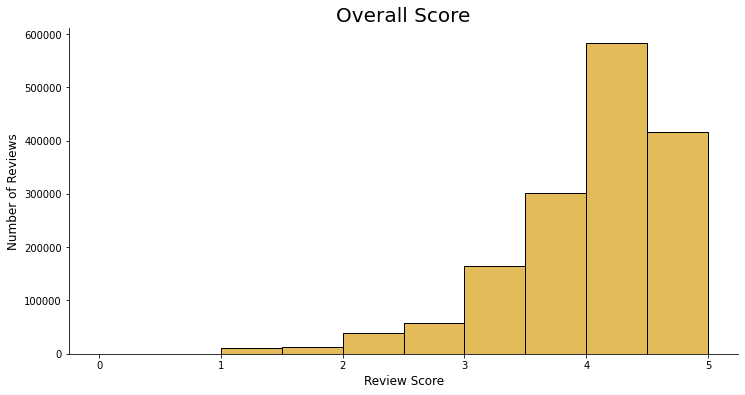

In [13]:
_ = plt.figure(figsize=(12,6))
_ = sns.histplot(data=reviews, x='review_overall', bins=bins, color='goldenrod')

_ = sns.despine()

_ = plt.title('Overall Score', fontsize=20)
_ = plt.xlabel('Review Score', fontsize=12)
_ = plt.ylabel('Number of Reviews', fontsize=12)

plt.show()

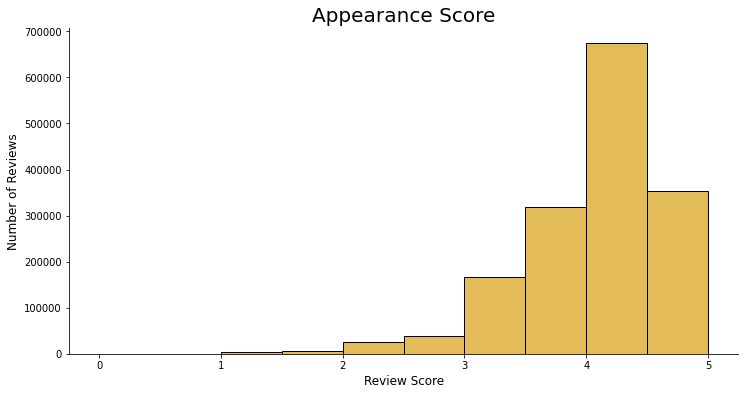

In [14]:
_ = plt.figure(figsize=(12,6))
_ = sns.histplot(data=reviews, x='review_appearance', bins=bins, color='goldenrod')

_ = sns.despine()

_ = plt.title('Appearance Score', fontsize=20)
_ = plt.xlabel('Review Score', fontsize=12)
_ = plt.ylabel('Number of Reviews', fontsize=12)

plt.show()

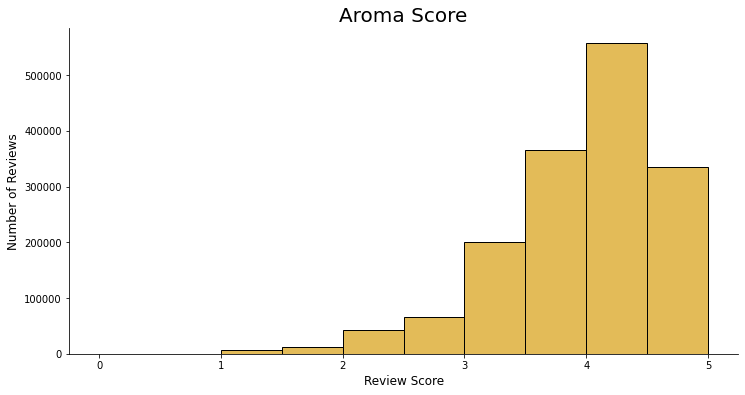

In [15]:
_ = plt.figure(figsize=(12,6))
_ = sns.histplot(data=reviews, x='review_aroma', bins=bins, color='goldenrod')

_ = sns.despine()

_ = plt.title('Aroma Score', fontsize=20)
_ = plt.xlabel('Review Score', fontsize=12)
_ = plt.ylabel('Number of Reviews', fontsize=12)

plt.show()

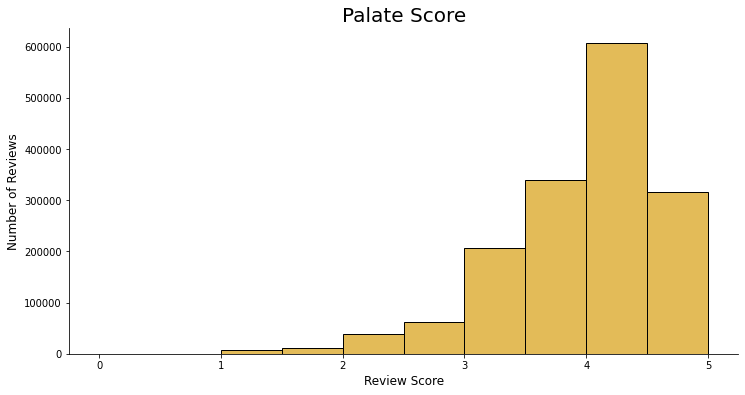

In [16]:
_ = plt.figure(figsize=(12,6))
_ = sns.histplot(data=reviews, x='review_palate', bins=bins, color='goldenrod')

_ = sns.despine()

_ = plt.title('Palate Score', fontsize=20)
_ = plt.xlabel('Review Score', fontsize=12)
_ = plt.ylabel('Number of Reviews', fontsize=12)

plt.show()

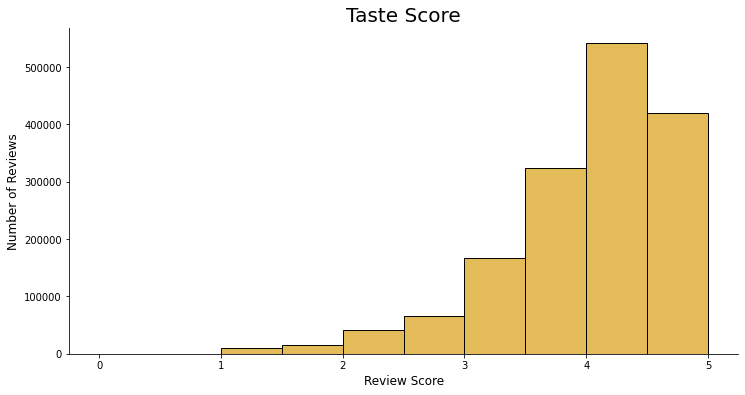

In [17]:
_ = plt.figure(figsize=(12,6))
_ = sns.histplot(data=reviews, x='review_taste', bins=bins, color='goldenrod')

_ = sns.despine()

_ = plt.title('Taste Score', fontsize=20)
_ = plt.xlabel('Review Score', fontsize=12)
_ = plt.ylabel('Number of Reviews', fontsize=12)

plt.show()

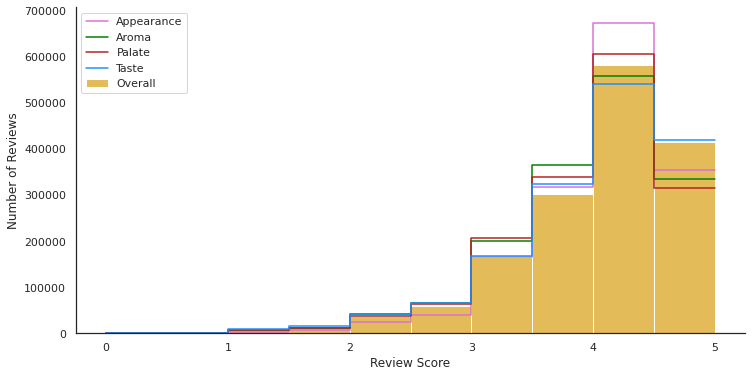

In [18]:
_ = plt.figure(figsize=(12,6))
#_ = sns.despine()
_ = sns.set_theme(style="white")


_ = sns.histplot(data=reviews, x="review_overall",bins=bins, color="goldenrod", label="Overall")
_ = sns.histplot(data=reviews, x="review_appearance", bins=bins, color="orchid", label="Appearance", element='step', fill=False)
_ = sns.histplot(data=reviews, x="review_aroma", bins=bins, color="green", label="Aroma", element='step', fill=False)
_ = sns.histplot(data=reviews, x="review_palate", bins=bins, color="firebrick", label="Palate", element='step', fill=False)
_ = sns.histplot(data=reviews, x="review_taste", bins=bins, color="dodgerblue", label="Taste", element='step', fill=False)

_ = sns.despine()

_ = plt.xlabel('Review Score', fontsize=12)
_ = plt.ylabel('Number of Reviews', fontsize=12)
_ = plt.legend(loc='upper left') 

plt.show()

### Scoring Value Share

Another way to look at how the scoring varies between review score is by using a stack bar chart. This is done in the code below.

This shows us that Overall and Taste seem to have a higher proportion of 4 or higher reviews, while Aroma and Palate seem to have a higher share of 3.5 or under. Overall, as was shown in the historgram, there is a very small share of low scores across all review scores.

In [19]:
from functools import reduce

overall_vc = reviews.review_overall.value_counts(normalize=True).rename_axis('unique_values').reset_index()
appearance_vc = reviews.review_appearance.value_counts(normalize=True).rename_axis('unique_values').reset_index()
aroma_vc = reviews.review_aroma.value_counts(normalize=True).rename_axis('unique_values').reset_index()
palate_vc = reviews.review_palate.value_counts(normalize=True).rename_axis('unique_values').reset_index()
taste_vc = reviews.review_taste.value_counts(normalize=True).rename_axis('unique_values').reset_index()

vc_dfs = [overall_vc, appearance_vc, aroma_vc, palate_vc, taste_vc]

vc_merged = reduce(lambda  left,right: pd.merge(left,right,on=['unique_values'], how='left'), vc_dfs).fillna(0).sort_values(by='unique_values')

In [20]:
vc_merged = vc_merged.T.reset_index()
vc_merged.columns = vc_merged.iloc[0]
vc_merged.drop(index=0, inplace=True)
vc_merged['score_name'] = ['Overall', 'Appearance', 'Aroma', 'Palate', 'Taste']

In [21]:
#vc_merged.head(10)

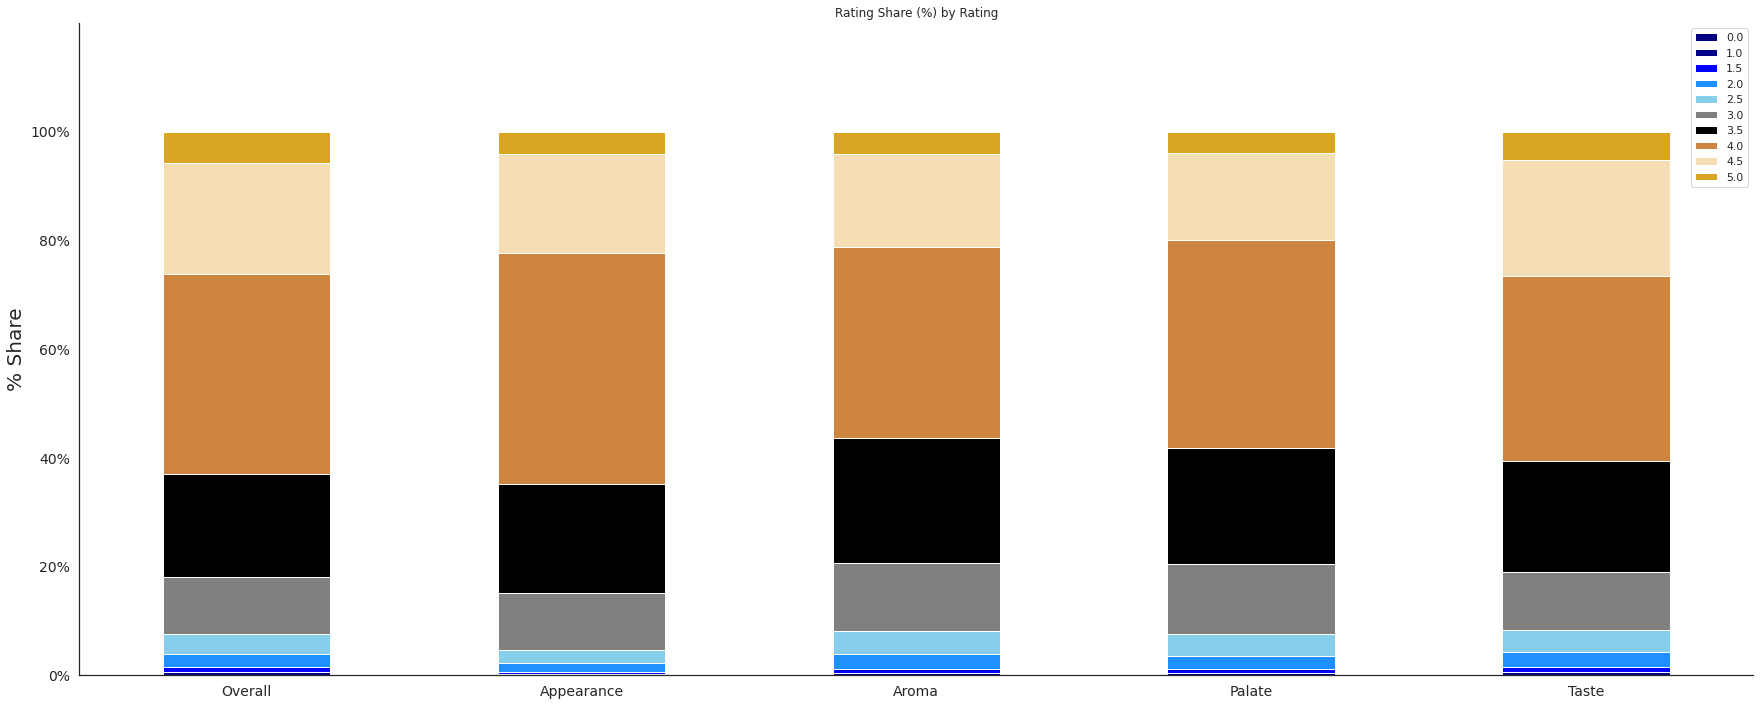

In [22]:
stack = vc_merged.plot.bar(x='score_name', stacked=True, figsize=(30,12), color=['navy', 'darkblue', 'blue', 'dodgerblue', 'skyblue', 'grey', 'black', 'peru',  'wheat', 'goldenrod'])

#cmap='autumn'
#color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'yellow', 'lightpink', 'darkcyan',  'firebrick', 'goldenrod']


stack.spines['top'].set_visible(False)
stack.spines['right'].set_visible(False)
stack.legend(loc='upper right')
plt.xticks(rotation=0, fontsize=14)
plt.ylim(0,1.2)
#plt.axhline(0.8, color='r', linestyle='--', linewidth=2)
#plt.axhline(0.6, color='r', linestyle='--', linewidth=2)
#plt.axhline(0.4, color='r', linestyle='--', linewidth=2)
#plt.axhline(0.2, color='r', linestyle='--', linewidth=2)
stack.set_yticks([0,0.2,0.4,0.6,0.8,1])
stack.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=14)

#plt.title('New or Existing Properties (% of purchases)', fontsize=20)
plt.title('Rating Share (%) by Rating')
plt.ylabel('% Share', fontsize=20)
plt.xlabel(None)

plt.show()

### Binning Scores

The above data seems to indicate that binning our scoring data might be a good approach. This could also be extremely useful when it comes to rolling up our data to beer-level to allow us to have counts by scoring bins.

We will use the Beer Advocate scale but will reduce to give groups, given the low level of ratings below 3 and there being no distinction between 'Good' and 'Very Good' in our data. Based on this, we have the following groups:

* 4.50 - 5.00 = World-Class (Level 5)
* 4.00 - 4.49 = Outstanding (Level 4)
* 3.50 - 3.99 = Good (Level 3)
* 3.00 - 3.49 = Okay (Level 2)
* 1.00 - 2.99 = Poor (Level 1)

Like the histograms earlier, there is similar split across the scores - with Aroma and Palate having slightly higher number of negative reviews vs Appearance. For the overall score, we say a breakdown of:
* World-Class = 26%
* Outstanding = 37%
* Good = 19%
* Okay = 10%
* Poor = 8%

Looks like we have a very positive group of reviewers!

In [23]:
reviews['review_overall_bin'] = pd.cut(reviews['review_overall'],bins=[0, 2.99, 3.49, 3.99, 4.49, 5], labels=[1, 2, 3, 4, 5])
reviews['review_appearance_bin'] = pd.cut(reviews['review_appearance'],bins=[0, 2.99, 3.49, 3.99, 4.49, 5], labels=[1, 2, 3, 4, 5])
reviews['review_aroma_bin'] = pd.cut(reviews['review_aroma'],bins=[0, 2.99, 3.49, 3.99, 4.49, 5], labels=[1, 2, 3, 4, 5])
reviews['review_palate_bin'] = pd.cut(reviews['review_palate'],bins=[0, 2.99, 3.49, 3.99, 4.49, 5], labels=[1, 2, 3, 4, 5])
reviews['review_taste_bin'] = pd.cut(reviews['review_taste'],bins=[0, 2.99, 3.49, 3.99, 4.49, 5], labels=[1, 2, 3, 4, 5])

In [24]:
from functools import reduce

overall_vc = reviews.review_overall_bin.value_counts(normalize=True).rename_axis('unique_values').reset_index()
appearance_vc = reviews.review_appearance_bin.value_counts(normalize=True).rename_axis('unique_values').reset_index()
aroma_vc = reviews.review_aroma_bin.value_counts(normalize=True).rename_axis('unique_values').reset_index()
palate_vc = reviews.review_palate_bin.value_counts(normalize=True).rename_axis('unique_values').reset_index()
taste_vc = reviews.review_taste_bin.value_counts(normalize=True).rename_axis('unique_values').reset_index()

vc_dfs = [overall_vc, appearance_vc, aroma_vc, palate_vc, taste_vc]

vc_merged = reduce(lambda  left,right: pd.merge(left,right,on=['unique_values'], how='left'), vc_dfs).sort_values(by='unique_values')

vc_merged = vc_merged.T.reset_index()
vc_merged.columns = vc_merged.iloc[0]
vc_merged.drop(index=0, inplace=True)
vc_merged['score_name'] = ['Overall', 'Appearance', 'Aroma', 'Palate', 'Taste']

In [25]:
vc_merged.head()

,unique_values,1.0,2.0,3.0,4.0,5.0,score_name
1,review_overall_bin,0.076060,0.104401,0.190228,0.367302,0.262009,Overall
2,review_appearance_bin,0.046878,0.104631,0.200761,0.424923,0.222806,Appearance
3,review_aroma_bin,0.080878,0.126074,0.230246,0.351303,0.211499,Aroma
4,review_palate_bin,0.075062,0.130424,0.213401,0.382394,0.198720,Palate
5,review_taste_bin,0.084233,0.105167,0.204549,0.341248,0.264802,Taste


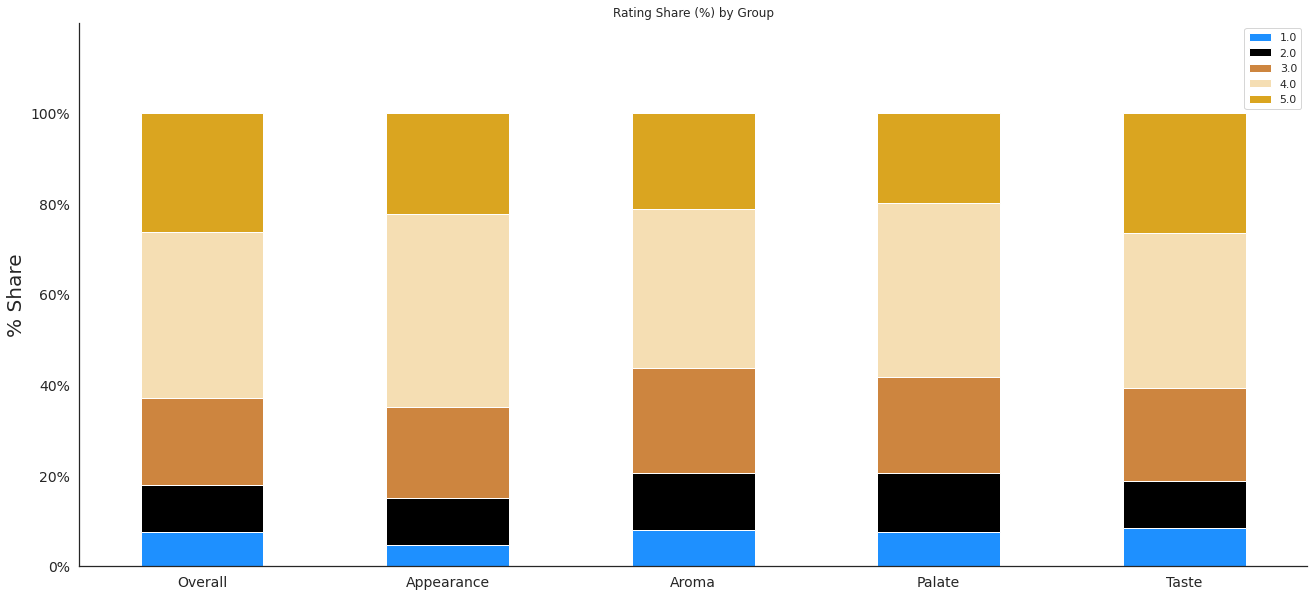

In [26]:
stack = vc_merged.plot.bar(x='score_name', stacked=True, figsize=(22,10), color=['dodgerblue', 'black', 'peru', 'wheat', 'goldenrod'])

#cmap='autumn'
#color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'yellow', 'lightpink', 'darkcyan',  'firebrick', 'goldenrod']


stack.spines['top'].set_visible(False)
stack.spines['right'].set_visible(False)
stack.legend(loc='upper right')
plt.xticks(rotation=0, fontsize=14)
plt.ylim(0,1.2)
#plt.axhline(0.8, color='r', linestyle='--', linewidth=2)
#plt.axhline(0.6, color='r', linestyle='--', linewidth=2)
#plt.axhline(0.4, color='r', linestyle='--', linewidth=2)
#plt.axhline(0.2, color='r', linestyle='--', linewidth=2)
stack.set_yticks([0,0.2,0.4,0.6,0.8,1])
stack.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=14)

#plt.title('New or Existing Properties (% of purchases)', fontsize=20)
plt.title('Rating Share (%) by Group')
plt.ylabel('% Share', fontsize=20)
plt.xlabel(None)

plt.show()

### Boxplots and Outliers

Looking further into the distribution of these scores, the boxplots below give us a sense the shape of the data. The results below show that:
* Score of 5 is not an outlier for Overall or Taste but is for the other 3 scores
* Overall and Taste have the largest ranges and inter-quartile ranges (IQR) compared to the other 3 scores
* Appearance, Aroma and Palate are more prone to outliers on both the positive and negative side - where as Overall and Taste only see outliers on the negative side
* All scores experiences outliers on the low side

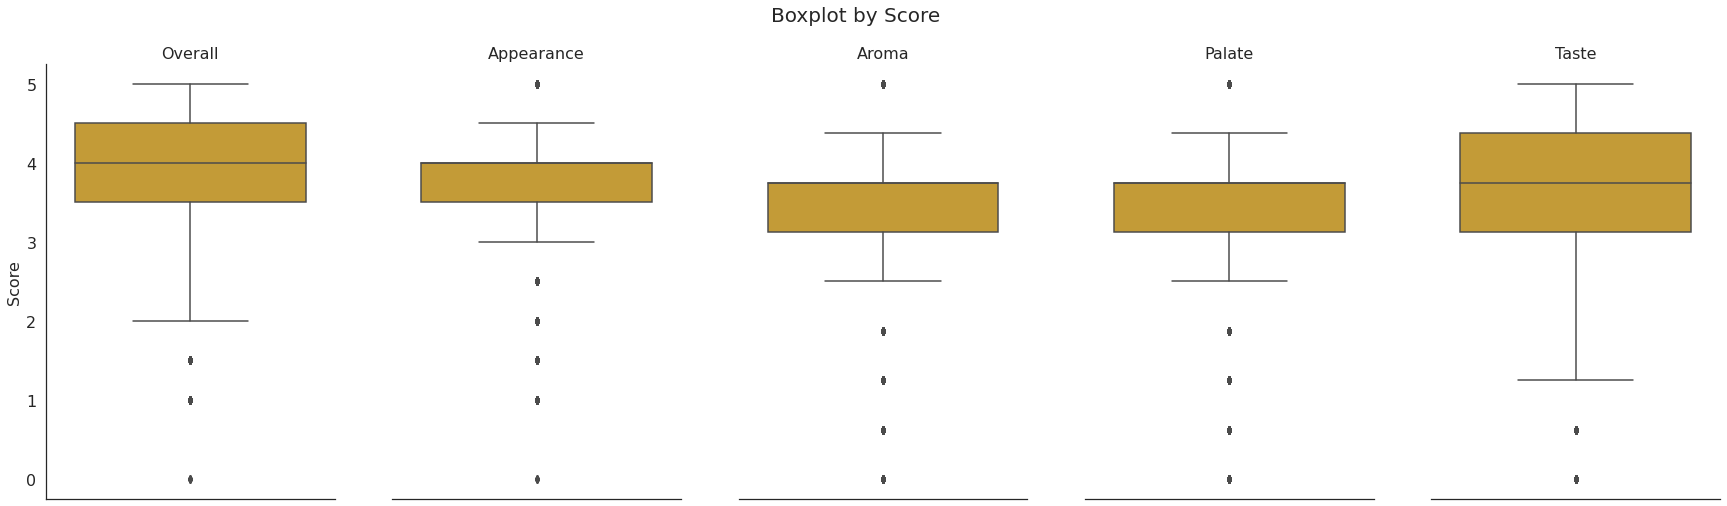

In [27]:
figure, axis = plt.subplots(1, 5, figsize=(30, 8))

figure.suptitle('Boxplot by Score', fontsize=20)

sns.boxplot(ax=axis[0], data=reviews, y='review_overall', color='goldenrod')
axis[0].set_title('Overall', fontsize=16)
axis[0].set_ylabel('Score', fontsize=16)
axis[0].tick_params(axis ='y', labelsize=16)
axis[0].spines['top'].set_visible(False)
axis[0].spines['right'].set_visible(False)

sns.boxplot(ax=axis[1], data=reviews, y='review_appearance', color='goldenrod')
axis[1].set_title('Appearance', fontsize=16)
axis[1].spines['left'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[1].spines['right'].set_visible(False)
axis[1].axes.get_yaxis().set_visible(False)

sns.boxplot(ax=axis[2], data=reviews, y='review_aroma', color='goldenrod')
axis[2].set_title('Aroma', fontsize=16)
axis[2].spines['left'].set_visible(False)
axis[2].spines['top'].set_visible(False)
axis[2].spines['right'].set_visible(False)
axis[2].axes.get_yaxis().set_visible(False)

sns.boxplot(ax=axis[3], data=reviews, y='review_palate', color='goldenrod')
axis[3].set_title('Palate', fontsize=16)
axis[3].spines['left'].set_visible(False)
axis[3].spines['top'].set_visible(False)
axis[3].spines['right'].set_visible(False)
axis[3].axes.get_yaxis().set_visible(False)

sns.boxplot(ax=axis[4], data=reviews, y='review_taste', color='goldenrod')
axis[4].set_title('Taste', fontsize=16)
axis[4].spines['left'].set_visible(False)
axis[4].spines['top'].set_visible(False)
axis[4].spines['right'].set_visible(False)
axis[4].axes.get_yaxis().set_visible(False)

plt.show()

In [28]:
#print('Score (75th percentile): ', round(reviews.review_overall.quantile(0.75), 2))
#print('Score (25th percentile): ', round(reviews.review_overall.quantile(0.25), 2))

#print('Score (75th percentile): ', round(np.percentile(reviews.review_overall, 75), 2))
#print('Score (25th percentile): ', round(np.percentile(reviews.review_overall, 25), 2))

### Mean Scores and Standard Deviation

The distributions and shares of review scores give us a comprehensive view of the beers were being judged. However, for a single view on performance, the best metric to look for each score is the average. Also, for a single metric to view the variation in the scoring across the data, we will look at the standard deviation of each score. 

The mean score in the dataset is 3.82 - quite high in a scale of 5. These average scores again highlight the similairity across the the scores but does show that trend that reviewers tend to be more negative on Aroma and Palate and more positive on Appearance.

The standard deviation in the data is 0.72 - meaning scores are +/- 0.72 of each other with 66% confidence interval. The deviation is lower amongst the other scores except for taste which is higher at 0.73.

In [29]:
scores_list = ['review_overall', 'review_appearance', 'review_aroma', 'review_palate', 'review_taste']

score_summ = reviews[scores_list].mean().rename_axis('score_type').reset_index(name='mean')
score_summ['median'] = reviews[scores_list].median().rename_axis('score_type').reset_index(name='median')['median']
score_summ['std'] = reviews[scores_list].std().rename_axis('score_type').reset_index(name='std')['std']
score_summ['score_name'] = ['Overall', 'Appearance', 'Aroma', 'Palate', 'Taste']

In [30]:
#score_summ.head()

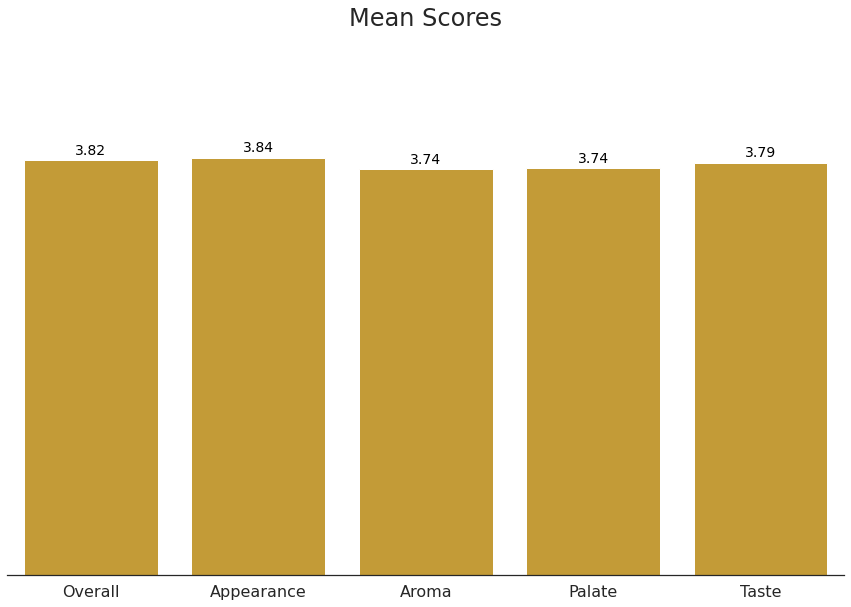

In [31]:
#score_summ = score_summ.sort_values(by='mean')

_ = plt.figure(figsize=(15, 10))
chart = sns.barplot(data=score_summ, x='score_name', y='mean', color='goldenrod', ci=None)
_ = sns.despine()

_ = plt.title('Mean Scores', fontsize=24)
_ = plt.xlabel(None)
#_ = plt.xlabel('Score Type', fontsize=18)
chart.spines['left'].set_visible(False)
chart.axes.get_yaxis().set_visible(False)
_ = plt.xticks(rotation=0, fontsize=16)
_ = plt.ylabel('Score', fontsize=18)
_ = plt.ylim(0,5)

for p in chart.patches:
  chart.annotate("%.2f" % p.get_height(), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                 va='center', fontsize=14, color='black', xytext=(0, 10), textcoords='offset points')


plt.show()

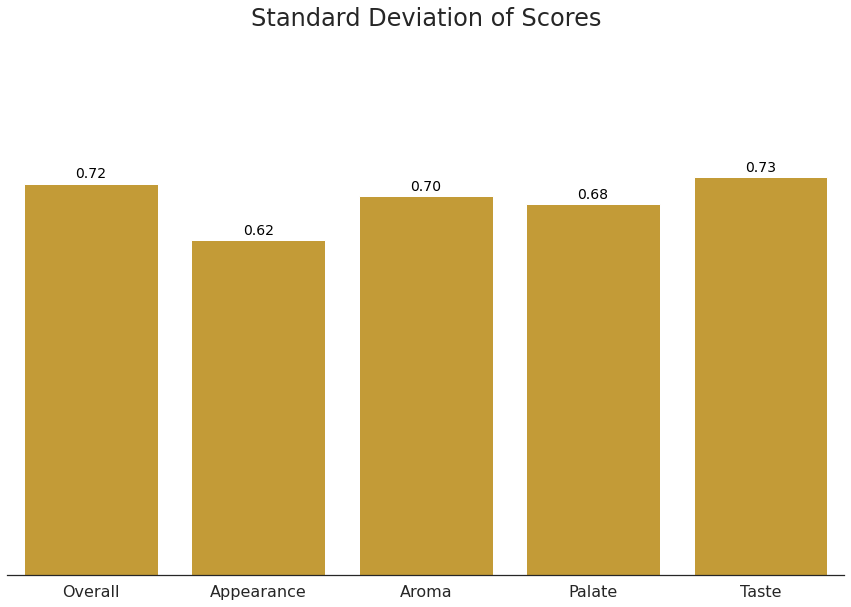

In [32]:
_ = plt.figure(figsize=(15, 10))
chart = sns.barplot(data=score_summ, x='score_name', y='std', color='goldenrod', ci=None)
_ = sns.despine()

_ = plt.title('Standard Deviation of Scores', fontsize=24)
_ = plt.xlabel(None)
#_ = plt.xlabel('Score Type', fontsize=18)
chart.spines['left'].set_visible(False)
chart.axes.get_yaxis().set_visible(False)
_ = plt.xticks(rotation=0, fontsize=16)
_ = plt.ylabel('Score', fontsize=18)
_ = plt.ylim(0,1)

for p in chart.patches:
  chart.annotate("%.2f" % p.get_height(), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                 va='center', fontsize=14, color='black', xytext=(0, 10), textcoords='offset points')


plt.show()

### Bootstraping a Distribution

Applying a boostrap to the Overall Score Distribution shows us that the mean is 3.82 with a margin of error of 0.001 (at 95% confidence interval).

While we won't apply this to all the scores above, this result gives us confidence that mean of our dataset correctly reflects the true mean score (given the small margin for error).

In [33]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [34]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [35]:
bootstrap_dist = draw_bs_reps(reviews['review_overall'], np.mean, size=10000)

In [36]:
conf_int = np.percentile(bootstrap_dist, [2.5, 97.5])
print('95% confidence interval =', round(conf_int[0], 2), 'to', round(conf_int[1], 2), 'points')

95% confidence interval = 3.81 to 3.82 points


In [37]:
moe_bootstrap_dist = 1.96 * np.std(bootstrap_dist)
print('Margin of Error: ', round(moe_bootstrap_dist, 3))

mean_bootstrap_dist = np.mean(bootstrap_dist)
print('Sample Mean: ', round(mean_bootstrap_dist, 2))

high_bootstrap_dist = mean_bootstrap_dist + moe_bootstrap_dist
low_bootstrap_dist = mean_bootstrap_dist - moe_bootstrap_dist
#print(low_bootstrap_dist, high_bootstrap_dist)

Margin of Error:  0.001
Sample Mean:  3.82


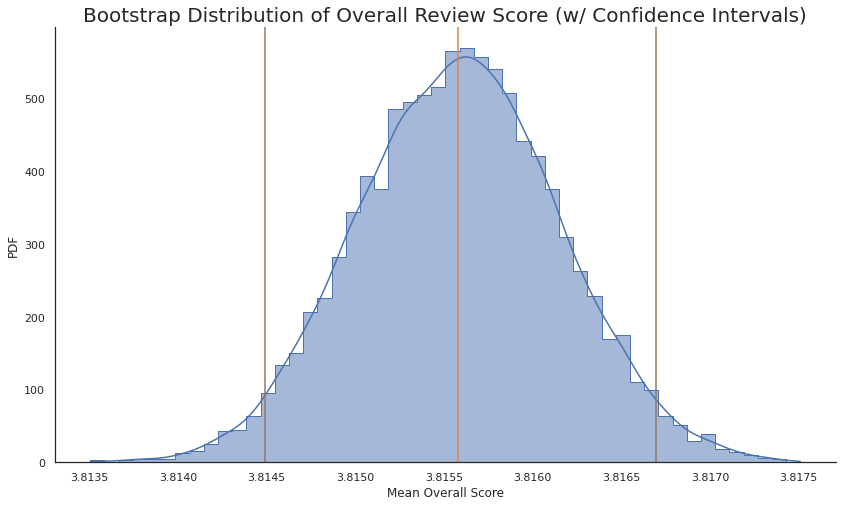

In [38]:
_ = plt.figure(figsize=(14,8))
bootstrap = sns.histplot(bootstrap_dist, bins=50, kde=True, element="step")
_ = plt.xlabel('Mean Overall Score')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrap Distribution of Overall Review Score (w/ Confidence Intervals)', fontsize=20)
_ = plt.axvline(reviews['review_overall'].mean(), color='C1')
_ = plt.axvline(conf_int[0], color='C5')
_ = plt.axvline(conf_int[1], color='C5')
bootstrap.spines['top'].set_visible(False)
bootstrap.spines['right'].set_visible(False)


plt.show()

### Correlation

As the EDA so far has shown us, there seems to be a lot of similarity in scoring between all five review scoring metrics. To see the extent of this, we will apply a correlation heatmap to the data to see how correlated these are to each other as well as the other numeric columns. 

The heatmap shows a strong correlation between all the scoring metrics with not a single combination scoring lower that 0.5 - meaning that higher or lower score in one metric will translate across to another.

Couple of other intersting note include:
* Beer ABV looks to be positvely correlated with all review scores
* Breweries with bars, eateries, and beer-to-go seem to all positively correlated (suggesting that brewery that decide to deliver one of these services would to offer them all). This can be incorporated at later modelling stage to only include one and not all to avoid multicollinearity.  

Lastly, we've generated two average metrics that incorporate all five of the scoring metrics in the dataset currently (overall, appearance, aroma, palate, taste) as this could be used as proxy measure to incorporate all five scores into one for our analysis.
1. An average giving each score equal weight
2. An average weighting each score based on Beer Advocate rating system


In [39]:
reviews['score_avg'] = (reviews.review_overall + reviews.review_appearance + reviews.review_aroma + reviews.review_palate + reviews.review_taste) / 5
reviews['score_weight_avg'] = ((reviews.review_overall * 20) + (reviews.review_appearance * 6) + (reviews.review_aroma * 24) + (reviews.review_palate * 10) + (reviews.review_taste * 40)) / 100

In [40]:
#reviews.score_avg.value_counts()

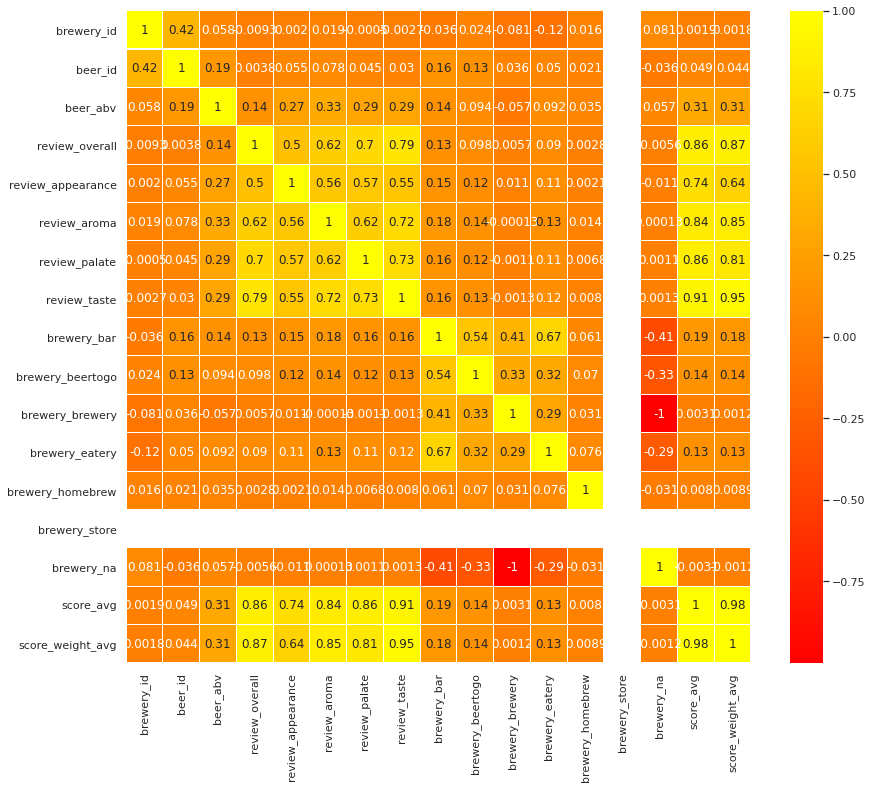

In [41]:
_ = plt.figure(figsize=(14, 12))
_ = sns.heatmap(reviews.corr(), linewidth=.1, cmap='autumn', annot=True)

plt.show()

In [42]:
#print('Appearance: ', round(np.corrcoef(reviews['review_overall'], reviews['review_appearance'])[0, 1], 2))
#print('Aroma: ', round(np.corrcoef(reviews['review_overall'], reviews['review_aroma'])[0, 1], 2))
#print('Palate: ', round(np.corrcoef(reviews['review_overall'], reviews['review_palate'])[0, 1], 2))
#print('Taste: ', round(np.corrcoef(reviews['review_overall'], reviews['review_taste'])[0, 1], 2))

#### Review Score and Beer ABV

One interesting correlation was that of Beer ABV with the all the different review scores. The correlation is highest with aroma and lowest with overall score but postive for all.

To test if this correlation is statistically significant, we applied a permutation test to the data. We used the Pearson coefficient of the average review score (of five metrics) and the Beer ABV and ran 1,000 permutations to see if that by randomly selecting ABV values across our data would we achieve a similar correlation. The null hypothesis is that beer review score and Beer ABV are independent and not correlationd. Applying the test gave us a p-value of 0.0 shows that in the 1,000 permutations ran, none of them generated a correlation coefficient higher than the one obtained in the actual dataset. Because of this low value, we can reject the Null Hypothesis that beer score review scores and Beer ABV are uncorrelated.


In [43]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [44]:
r_obs = pearson_r(reviews['score_weight_avg'], reviews['beer_abv'])
print(r_obs)

0.30646388513984246


In [45]:
perm_replicates = np.empty(1000)

# Draw replicates
for i in range(1000):
    abv_permuted = np.random.permutation(reviews['beer_abv'])

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(reviews['score_weight_avg'], abv_permuted)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


#### Taste and Aroma

The second theory we wanted to test was whether the taste of a beer was significantly correlated with the taste of a beer.

The resulting p-value of 0.0 indicates that we can reject the null hypothesis that these two variables are not correlated.

In [46]:
r_obs = pearson_r(reviews['review_aroma'], reviews['review_taste'])
print(r_obs)

0.7167761250223557


In [47]:
perm_replicates = np.empty(1000)

# Draw replicates
for i in range(1000):
    taste_permuted = np.random.permutation(reviews['review_taste'])

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(reviews['review_aroma'], taste_permuted)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


## Tidying Data

Our EDA to this point - both here and on Tableau - has uncovered some interesting information regarding review performance. As part of this, we have had to alter some of the data in the dataset to make it cleaner, easier to understand, and more in line with the commomn groupings used in the beer industry. 

In the following sections, we will be tidying the dataset to make our dataset cleaner and more interpretable for our analysis and modelling later on.

### Beer Availability

Reduce the number of unique fields in the Beer Availability column from 8 to 4.

In [48]:
reviews.beer_availability.nunique()

8

In [49]:
#reviews.beer_availability.value_counts()

In [50]:
reviews['beer_availability'] = reviews.beer_availability.str.replace('  ', ' ')

In [51]:
#reviews.beer_availability.value_counts()

In [52]:
reviews['beer_availability'] = np.where((reviews.beer_availability == 'Year Round') | (reviews.beer_availability == 'Limited Brewed Once') | (reviews.beer_availability == 'N/A'), reviews.beer_availability, 'Rotational')

In [53]:
reviews.beer_availability.value_counts()

Year Round             793580
Rotational             508813
N/A                    170772
Limited Brewed Once    113449
Name: beer_availability, dtype: int64

### Beer Style

There are 104 unique beer styles in the dataset. Translating these into dummy variables later on for our modelling would create too many dimensions so during our EDA in Tableau - we grouped these beer styles into 15 beer styles. These beer styles were assigned based on the Beer Advocate's definition found at the link below:

https://www.beeradvocate.com/beer/styles/ 

In [54]:
reviews.beer_style.nunique()

104

In [55]:
#reviews.beer_style.value_counts()

In [56]:
#reviews.beer_style.unique()

In [57]:
reviews.rename(columns={'beer_style':'beer_style_detail'}, inplace=True)

In [58]:
### Defaults
reviews.loc[(reviews['beer_style_detail'].str.contains('beer', case=False)) | (reviews['beer_style_detail'].str.contains('bier', case=False)), 'beer_style'] = 'Speciality Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('ale', case=False), 'beer_style'] = 'Other Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('lager', case=False), 'beer_style'] = 'Pale Lager' 

### Strong Ale
reviews.loc[(reviews['beer_style_detail'].str.contains('strong', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Strong Ale' 
reviews.loc[(reviews['beer_style_detail'].str.contains('old', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Strong Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('barleywine', case=False), 'beer_style'] = 'Strong Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('wheatwine', case=False), 'beer_style'] = 'Strong Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('quadrupel', case=False), 'beer_style'] = 'Strong Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('tripel', case=False), 'beer_style'] = 'Strong Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('wee heavy', case=False), 'beer_style'] = 'Strong Ale' 

### Pale Ale
reviews.loc[(reviews['beer_style_detail'].str.contains('pale', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Pale Ale' 
reviews.loc[(reviews['beer_style_detail'].str.contains('blonde', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Pale Ale' 
reviews.loc[(reviews['beer_style_detail'].str.contains('red', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Pale Ale' 
reviews.loc[(reviews['beer_style_detail'].str.contains('mild', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Pale Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('saison', case=False), 'beer_style'] = 'Pale Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('bitter', case=False), 'beer_style'] = 'Pale Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('k lsch', case=False), 'beer_style'] = 'Pale Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('de garde', case=False), 'beer_style'] = 'Pale Ale' 

### Dark Ale
reviews.loc[(reviews['beer_style_detail'].str.contains('dark', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Dark Ale' 
reviews.loc[(reviews['beer_style_detail'].str.contains('scottish', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Dark Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('rye beer', case=False), 'beer_style'] = 'Dark Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('dubbel', case=False), 'beer_style'] = 'Dark Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('roggenbier', case=False), 'beer_style'] = 'Dark Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('winter warmer', case=False), 'beer_style'] = 'Dark Ale' 

### Brown Ale
reviews.loc[(reviews['beer_style_detail'].str.contains('dark', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)) & (reviews['beer_style_detail'].str.contains('mild', case=False)), 'beer_style'] = 'Brown Ale' 
reviews.loc[(reviews['beer_style_detail'].str.contains('brown', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Brown Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('altbier', case=False), 'beer_style'] = 'Brown Ale' 

### IPA
reviews.loc[(reviews['beer_style_detail'].str.contains('black', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'IPA' 
reviews.loc[reviews['beer_style_detail'].str.contains('ipa', case=False), 'beer_style'] = 'IPA' 

### Pale Lagers
reviews.loc[(reviews['beer_style_detail'].str.contains('pilsener', case=False)) | (reviews['beer_style_detail'].str.contains('pilsner', case=False)), 'beer_style'] = 'Pale Lager' 
reviews.loc[(reviews['beer_style_detail'].str.contains('adjunct', case=False)) & (reviews['beer_style_detail'].str.contains('lager', case=False)), 'beer_style'] = 'Pale Lager' 
reviews.loc[(reviews['beer_style_detail'].str.contains('malt', case=False)) & (reviews['beer_style_detail'].str.contains('liquor', case=False)), 'beer_style'] = 'Pale Lager' 
reviews.loc[(reviews['beer_style_detail'].str.contains('keller', case=False)) & (reviews['beer_style_detail'].str.contains('zwickel', case=False)), 'beer_style'] = 'Pale Lager' 
reviews.loc[reviews['beer_style_detail'].str.contains('lager', case=False), 'beer_style'] = 'Pale Lager' 

### Dark Lagers
reviews.loc[(reviews['beer_style_detail'].str.contains('vienna', case=False)) & (reviews['beer_style_detail'].str.contains('lager', case=False)), 'beer_style'] = 'Dark Lager' 
reviews.loc[(reviews['beer_style_detail'].str.contains('dark', case=False)) & (reviews['beer_style_detail'].str.contains('lager', case=False)), 'beer_style'] = 'Dark Lager' 
reviews.loc[(reviews['beer_style_detail'].str.contains('red', case=False)) & (reviews['beer_style_detail'].str.contains('lager', case=False)), 'beer_style'] = 'Dark Lager' 
reviews.loc[reviews['beer_style_detail'].str.contains('oktoberfest', case=False), 'beer_style'] = 'Dark Lager' 
reviews.loc[reviews['beer_style_detail'].str.contains('dunkel', case=False), 'beer_style'] = 'Dark Lager' 
reviews.loc[reviews['beer_style_detail'].str.contains('rauchbier', case=False), 'beer_style'] = 'Dark Lager' 
reviews.loc[reviews['beer_style_detail'].str.contains('schwarzbier', case=False), 'beer_style'] = 'Dark Lager' 

### Speciality Beer
reviews.loc[reviews['beer_style_detail'].str.contains('happoshu', case=False), 'beer_style'] = 'Speciality Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('kvass', case=False), 'beer_style'] = 'Speciality Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('sahti', case=False), 'beer_style'] = 'Speciality Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('rice', case=False), 'beer_style'] = 'Speciality Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('pumpkin', case=False), 'beer_style'] = 'Speciality Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('beer', case=False), 'beer_style'] = 'Speciality Beer' 

### Wild / Sour Beer
reviews.loc[reviews['beer_style_detail'].str.contains('lambic', case=False), 'beer_style'] = 'Wild / Sour Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('sour', case=False), 'beer_style'] = 'Wild / Sour Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('wild', case=False), 'beer_style'] = 'Wild / Sour Beer' 
reviews.loc[(reviews['beer_style_detail'].str.contains('flanders', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Wild / Sour Beer' 
reviews.loc[(reviews['beer_style_detail'].str.contains('flanders', case=False)) & (reviews['beer_style_detail'].str.contains('bruin', case=False)), 'beer_style'] = 'Wild / Sour Beer' 
reviews.loc[(reviews['beer_style_detail'].str.contains('berliner', case=False)) & (reviews['beer_style_detail'].str.contains('weiss', case=False)), 'beer_style'] = 'Wild / Sour Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('gose', case=False), 'beer_style'] = 'Wild / Sour Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('faro', case=False), 'beer_style'] = 'Wild / Sour Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('gueuze', case=False), 'beer_style'] = 'Wild / Sour Beer' 

### Hybrid Beer
reviews.loc[(reviews['beer_style_detail'].str.contains('black', case=False)) & (reviews['beer_style_detail'].str.contains('tan', case=False)), 'beer_style'] = 'Hybrid Beer' 
reviews.loc[(reviews['beer_style_detail'].str.contains('cream', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Hybrid Beer' 
reviews.loc[(reviews['beer_style_detail'].str.contains('steam', case=False)) & (reviews['beer_style_detail'].str.contains('beer', case=False)), 'beer_style'] = 'Hybrid Beer' 
reviews.loc[(reviews['beer_style_detail'].str.contains('de Champagne', case=False)) | (reviews['beer_style_detail'].str.contains('brut', case=False)), 'beer_style'] = 'Hybrid Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('Braggot', case=False), 'beer_style'] = 'Hybrid Beer' 

### Wheat Beer
reviews.loc[(reviews['beer_style_detail'].str.contains('wheat', case=False)) & (reviews['beer_style_detail'].str.contains('beer', case=False)), 'beer_style'] = 'Wheat Beer' 
reviews.loc[(reviews['beer_style_detail'].str.contains('wheat', case=False)) & (reviews['beer_style_detail'].str.contains('ale', case=False)), 'beer_style'] = 'Wheat Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('witbier', case=False), 'beer_style'] = 'Wheat Beer' 
reviews.loc[reviews['beer_style_detail'].str.contains('weizen', case=False), 'beer_style'] = 'Wheat Beer' 

### Stout, Porter & Bock

reviews.loc[reviews['beer_style_detail'].str.contains('bock', case=False), 'beer_style'] = 'Bock' 
reviews.loc[reviews['beer_style_detail'].str.contains('stout', case=False), 'beer_style'] = 'Stout' 
reviews.loc[reviews['beer_style_detail'].str.contains('porter', case=False), 'beer_style'] = 'Porter' 


In [59]:
reviews.beer_style.value_counts()

Pale Ale            277419
IPA                 243439
Stout               182268
Strong Ale          161475
Pale Lager          134054
Dark Ale             97279
Wheat Beer           93048
Speciality Beer      79496
Porter               73249
Dark Lager           68174
Bock                 55913
Brown Ale            54884
Wild / Sour Beer     52296
Hybrid Beer          13620
Name: beer_style, dtype: int64

### Beer Types

Overall, there are only two main types of beer - Ale and Lager. A description can be found at the link below for those interested.

https://drive.google.com/file/d/1M3JdrnSs1t9aikxcKbYlQQjuxpZ3Ok4a/view?usp=sharing 

This means that for all the beers in our dataset, they can be further classified into these two categories.

In [60]:
## Ales and Lagers

reviews.loc[reviews['beer_style'].str.contains('ipa', case=False), 'beer_type'] = 'Ale' 
reviews.loc[reviews['beer_style'].str.contains('ale', case=False), 'beer_type'] = 'Ale' 
reviews.loc[reviews['beer_style'].str.contains('bock', case=False), 'beer_type'] = 'Lager' 
reviews.loc[reviews['beer_style'].str.contains('beer', case=False), 'beer_type'] = 'Lager' 
reviews.loc[reviews['beer_style'].str.contains('lager', case=False), 'beer_type'] = 'Lager' 
reviews.loc[reviews['beer_style'].str.contains('porter', case=False), 'beer_type'] = 'Ale' 
reviews.loc[reviews['beer_style'].str.contains('stout', case=False), 'beer_type'] = 'Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('ale', case=False), 'beer_type'] = 'Ale' 
reviews.loc[reviews['beer_style_detail'].str.contains('lager', case=False), 'beer_type'] = 'Lager' 

reviews.beer_type.fillna('n/a', inplace=True)

In [61]:
reviews.beer_type.value_counts()

Ale      1160833
Lager     425781
Name: beer_type, dtype: int64

In [62]:
#reviews[reviews['beer_type'] == 'Ale']['beer_style_detail'].unique()

In [63]:
#reviews[reviews.beer_style.isnull()]

In [64]:
#reviews.loc[(reviews.beer_style_detail == 'German Pilsener')]

In [65]:
#reviews.beer_style_detail.unique()

### Brewery Region

Our EDA highlighted that there the US breweries are by far the most reviewed in the dataset at 70.5% (excluding n/a) - followed European breweries at 23%, Canadian breweries at 3.7% and Rest of World at 2.9%.

Below we group the data into these categories to support rest of our analysis.

In [66]:
reviews['brewery_region'] = reviews.brewery_country.str.replace('US', 'USA')
reviews['brewery_region'] = reviews.brewery_region.str.replace('CA', 'Canada')

reviews['brewery_region'] = reviews.brewery_region.str.replace('AL', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('AT', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('BA', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('BE', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('BG', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('BY', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('CH', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('CY', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('CZ', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('DE', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('DK', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('EE', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('ES', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('FI', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('FO', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('FR', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('GB', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('GR', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('HR', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('HU', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('IE', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('IM', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('IS', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('IT', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('LI', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('LT', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('LU', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('LV', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('MC', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('MD', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('ME', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('MK', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('MT', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('NL', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('NO', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('PL', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('PT', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('RO', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('RS', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('RU', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('SE', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('SI', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('SK', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('SM', 'Europe')
reviews['brewery_region'] = reviews.brewery_region.str.replace('UA', 'Europe')

In [67]:
reviews['brewery_region'] = np.where((reviews.brewery_region != 'USA') & (reviews.brewery_region != 'Europe') & (reviews.brewery_region != 'Canada') & (reviews.brewery_region != 'N/A'), 'ROW', reviews.brewery_region)

In [68]:
reviews.brewery_region.value_counts()

USA       967603
Europe    314696
N/A       213761
Canada     50744
ROW        39810
Name: brewery_region, dtype: int64

### Brewery Area

Our EDA highlighted that there were certain US states and European countries that accounted for a high percentage of reviews in the dataset. With this in mind, we created an additional column called 'brewery_area' to group these into which may support with modelling at later stage.

In [69]:
reviews['brewery_area'] = np.where((reviews.brewery_state == 'CA' ), 'California', reviews.brewery_region)
reviews['brewery_area'] = np.where((reviews.brewery_state == 'CO' ), 'Colorado', reviews.brewery_area)
reviews['brewery_area'] = np.where((reviews.brewery_state == 'NY' ), 'New York', reviews.brewery_area)
reviews['brewery_area'] = np.where((reviews.brewery_state == 'OR' ), 'Oregon', reviews.brewery_area)
reviews['brewery_area'] = np.where((reviews.brewery_state == 'MA' ), 'Massachusetts', reviews.brewery_area)
reviews['brewery_area'] = np.where((reviews.brewery_state == 'MI' ), 'Michigan', reviews.brewery_area)
reviews['brewery_area'] = np.where((reviews.brewery_state == 'PA' ), 'Pennsylvania', reviews.brewery_area)
reviews['brewery_area'] = np.where((reviews.brewery_state == 'WI' ), 'Wisconsin', reviews.brewery_area)

reviews['brewery_area'] = np.where((reviews.brewery_country == 'BE' ), 'Belgium', reviews.brewery_area)
reviews['brewery_area'] = np.where((reviews.brewery_country == 'GB' ), 'United Kingdom', reviews.brewery_area)
reviews['brewery_area'] = np.where((reviews.brewery_country == 'DE' ), 'Germany', reviews.brewery_area)

In [70]:
reviews.brewery_area.value_counts()

USA               311510
California        217020
N/A               213761
Belgium           111294
Colorado           81965
New York           75744
Europe             69579
United Kingdom     68879
Germany            64944
Oregon             61207
Massachusetts      60719
Michigan           56423
Pennsylvania       53572
Canada             50744
Wisconsin          49443
ROW                39810
Name: brewery_area, dtype: int64

### Recency

The review date data shows us that the number of reviews in the dataset has been increasing over time - with a review dating back to 1996. Reviews of significant quantity started in 2002 and continued in the dataset until January 2012. 

For our project, we are more interested in beers that have been reviewed more recently - as these are seen as more relevant to today's beer drinkers. With this in mind, we created a metric to measure the time from the last date in the dataset (max date) to the time the review occured. This will be used as a measure of recency of the review and feed into how we group or cluster our beers.

In [71]:
#reviews.dtypes

In [72]:
reviews['review_time'] = pd.to_datetime(reviews['review_time']).dt.strftime('%Y-%m-%d')

In [73]:
reviews['review_time'] = pd.to_datetime(reviews['review_time'])

In [74]:
reviews['review_recency'] = reviews['review_time'].max() - reviews['review_time']

In [75]:
reviews['review_recency'] = reviews['review_recency'].dt.days

In [76]:
#reviews.dtypes

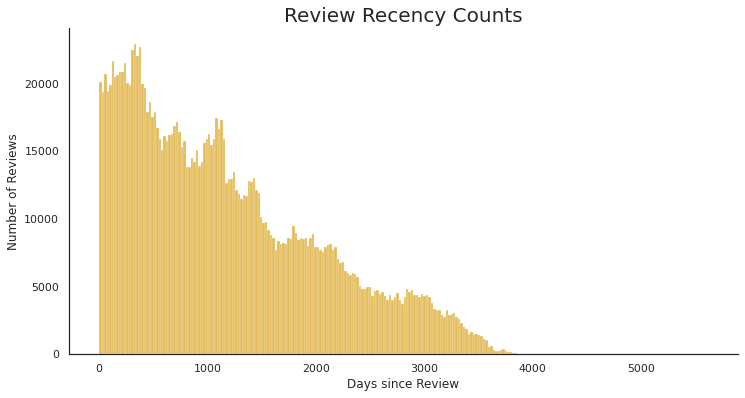

In [77]:
_ = plt.figure(figsize=(12,6))
_ = sns.histplot(data=reviews, x='review_recency', color='goldenrod')

_ = sns.despine()

_ = plt.title('Review Recency Counts', fontsize=20)
_ = plt.xlabel('Days since Review', fontsize=12)
_ = plt.ylabel('Number of Reviews', fontsize=12)

plt.show()

### Final Review

One last check to see if all our changes have been made to the dataset.

In the next section, we will look at how this be grouped to beer-level to allow us to analyse the best beers.

In [78]:
reviews.head()

,review_time,review_profilename,brewery_id,brewery_name,beer_id,beer_name,beer_style_detail,beer_abv,review_overall,review_appearance,review_aroma,review_palate,review_taste,brewery_city,brewery_state,brewery_country,beer_availability,beer_retired,brewery_bar,brewery_beertogo,brewery_brewery,brewery_eatery,brewery_homebrew,brewery_store,brewery_na,review_overall_bin,review_appearance_bin,review_aroma_bin,review_palate_bin,review_taste_bin,score_avg,score_weight_avg,beer_style,beer_type,brewery_region,brewery_area,review_recency
0,2009-02-16,stcules,10325,Vecchio Birraio,47986,Sausa Weizen,Hefeweizen,5.0,1.5,2.5,2.0,1.5,1.5,Marsango Di Campo San Martino (Pd),IT0,IT,Year Round,F,0,0,1,1,0,0,0,1,1,1,1,1,1.8,1.68,Wheat Beer,Lager,Europe,Europe,1059
1,2009-03-01,stcules,10325,Vecchio Birraio,48213,Red Moon,English Strong Ale,6.2,3.0,3.0,2.5,3.0,3.0,Marsango Di Campo San Martino (Pd),IT0,IT,Year Round,F,0,0,1,1,0,0,0,2,2,1,2,2,2.9,2.88,Strong Ale,Ale,Europe,Europe,1046
2,2009-03-01,stcules,10325,Vecchio Birraio,48215,Black Horse Black Beer,Foreign Export Stout,6.5,3.0,3.0,2.5,3.0,3.0,Marsango Di Campo San Martino (Pd),IT0,IT,Year Round,F,0,0,1,1,0,0,0,2,2,1,2,2,2.9,2.88,Stout,Ale,Europe,Europe,1046
3,2009-02-15,stcules,10325,Vecchio Birraio,47969,Sausa Pils,German Pilsener,5.0,3.0,3.5,3.0,2.5,3.0,Marsango Di Campo San Martino (Pd),IT0,IT,Year Round,F,0,0,1,1,0,0,0,2,3,2,1,2,3.0,2.98,Pale Lager,Lager,Europe,Europe,1060
4,2010-12-30,johnmichaelsen,1075,Caldera Brewing Company,64883,Cauldron Dipa,American Double Imperial Ipa,7.7,4.0,4.0,4.5,4.0,4.5,Ashland,OR,US,N/A,N/a,1,0,1,1,0,0,0,4,4,5,4,5,4.2,4.32,IPA,Ale,USA,Oregon,377


## Beer-level Dataset

Now, we move onto grouping our data to beer-level to allow us to analyse how each beer has performed in the dataset.

### Creating the dataset

First, we will group our data to beer-level using the groupby function. As part of this, we will look to create our dataset with only four key metics:
1. Number of Reviews
2. Average review score (using weighted average of five metrics previously discussed)
3. Standard Deviation of score (using weighted average score)
4. Recency of last review

In [79]:
beerlevel_groupby =  ['brewery_name', 'beer_name', 'beer_type', 'beer_style', 'beer_style_detail', 'beer_abv', 'brewery_region', 'brewery_area',
                      'brewery_city', 'brewery_state', 'brewery_country', 'beer_availability',
                      'beer_retired', 'brewery_bar', 'brewery_beertogo', 'brewery_brewery',
                      'brewery_eatery', 'brewery_homebrew', 'brewery_store', 'brewery_na']

beer = reviews.groupby(by=beerlevel_groupby, as_index=False)['score_weight_avg'].agg(['count', 'mean', 'std']).reset_index()

In [80]:
#beer.head()

In [81]:
beer.shape

(66045, 23)

In [82]:
beer['std'].fillna(0, inplace=True)

In [83]:
beer_recency = reviews.groupby(by=beerlevel_groupby, as_index=False)['review_recency'].agg(['min']).reset_index()

In [84]:
beer = pd.merge(beer, beer_recency, on=beerlevel_groupby, how='left')

In [85]:
beer.rename(columns={'count':'number_reviews', 'mean':'mean_score', 'std':'std_score', 'min':'recency_review'}, inplace=True)

In [86]:
beer.head()

,brewery_name,beer_name,beer_type,beer_style,beer_style_detail,beer_abv,brewery_region,brewery_area,brewery_city,brewery_state,brewery_country,beer_availability,beer_retired,brewery_bar,brewery_beertogo,brewery_brewery,brewery_eatery,brewery_homebrew,brewery_store,brewery_na,number_reviews,mean_score,std_score,recency_review
0,10 Barrel Brewing Co,10 Barrel Ipa,Ale,IPA,American Ipa,6.500000,USA,Oregon,Bend,OR,US,Year Round,F,1,1,1,1,0,0,0,1,3.4700,0.000000,1177
1,10 Barrel Brewing Co,10 Barrel Light,Ale,Pale Ale,American Blonde Ale,4.700000,USA,Oregon,Bend,OR,US,Year Round,F,1,1,1,1,0,0,0,1,4.0100,0.000000,1177
2,10 Barrel Brewing Co,Apocalypse Ipa,Ale,IPA,American Ipa,6.500000,USA,Oregon,Bend,OR,US,Year Round,F,1,1,1,1,0,0,0,25,3.6892,0.515832,98
3,10 Barrel Brewing Co,Big Black Stout,Ale,Stout,American Stout,6.276799,USA,Oregon,Bend,OR,US,Rotational,T,1,1,1,1,0,0,0,1,4.0000,0.000000,95
4,10 Barrel Brewing Co,Bourbon Bitter,Ale,Pale Ale,English Bitter,4.300000,USA,Oregon,Bend,OR,US,Limited Brewed Once,T,1,1,1,1,0,0,0,2,3.7000,0.113137,134


### Beer Name

Because there are over 60,000 uniques beers in our dataset and no industry standard for analysing names (unlike Beer Styles), it is difficult to use this as a feature for our analysis our modelling. One approach however is to apply text feature extraction model over this column to see if there are any specific words that commonly appear in our beer names and potentially use these as dimensions in our data set.

Below we apply the CountVectorizer and TfidfVectorizer algorithms from skearn to identify the common words in beer names. 

Both approaches throw up similar lists as would be expected. It is interesting to note that a lot of the names appearing here are similar to the beer types and styles that we worked on earlier (i.e. ale and lager, stouts and IPA). This seem to indicate that we are best to use either one or the other, beer types/styles or the text extractions below, and not both to reduce the number of features for our final dataset. Given that we know the beer types and styles are common to the beer industry, we will continue with these for now and not include the text below. However, for future studies, the use of text may be a quicker way to impute these to the dataset.

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0.02, max_df=0.95)

cv.fit(beer['beer_name'])
cv_transformed = cv.transform(beer['beer_name'])

cv_df = pd.DataFrame(cv_transformed.toarray(), columns=cv.get_feature_names()).add_prefix('name_')

In [88]:
cv_df.mean().sort_values(ascending=False)

name_ale         0.189068
name_stout       0.063381
name_ipa         0.051571
name_pale        0.049133
name_porter      0.039549
name_lager       0.035915
name_red         0.029571
name_wheat       0.023878
name_brown       0.023863
name_imperial    0.023514
name_black       0.022182
name_beer        0.020213
dtype: float64

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=20, stop_words='english')

tv.fit(beer['beer_name'])
train_tv_transformed = tv.transform(beer['beer_name'])

train_tv_df = pd.DataFrame(train_tv_transformed.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')

In [90]:
train_tv_df.mean().sort_values(ascending=False)

TFIDF_ale         0.141766
TFIDF_stout       0.055920
TFIDF_ipa         0.046944
TFIDF_pale        0.040040
TFIDF_porter      0.036870
TFIDF_lager       0.033620
TFIDF_red         0.025870
TFIDF_wheat       0.022223
TFIDF_brown       0.021104
TFIDF_black       0.018606
TFIDF_beer        0.018285
TFIDF_imperial    0.017444
TFIDF_amber       0.014872
TFIDF_blonde      0.013706
TFIDF_bock        0.013648
TFIDF_barrel      0.013332
TFIDF_aged        0.013331
TFIDF_pilsner     0.013133
TFIDF_belgian     0.012852
TFIDF_hop         0.012253
dtype: float64

### Brewery Name

We applied a similar technique to Brewery Name to see if there would be anything that stands out here. While interesting to see the different wording included in brewery names, renaming our brewery is unlikely to be part of this project and the addition of wording below will likely not add too much value to our analysis.

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=20, stop_words='english')

tv.fit(beer['brewery_name'])
train_tv_transformed = tv.transform(beer['brewery_name'])

train_tv_df = pd.DataFrame(train_tv_transformed.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')

In [92]:
train_tv_df.mean().sort_values(ascending=False)

TFIDF_brewing       0.271172
TFIDF_brewery       0.199765
TFIDF_company       0.183898
TFIDF_restaurant    0.046750
TFIDF_pub           0.030196
TFIDF_beer          0.027873
TFIDF_brasserie     0.025214
TFIDF_house         0.021659
TFIDF_brouwerij     0.020026
TFIDF_brew          0.019365
TFIDF_brauerei      0.019229
TFIDF_brewpub       0.018959
TFIDF_city          0.015447
TFIDF_rock          0.014575
TFIDF_ale           0.012966
TFIDF_brewhouse     0.010657
TFIDF_grill         0.010413
TFIDF_street        0.010382
TFIDF_river         0.010324
TFIDF_works         0.009087
dtype: float64

## Beer Segmentation (with Clustering)

Now, we look to cluster our beers using KMeans approach. The aim is to see if we can uncover any groups of beers that would be of interest to management and allow us to focus our modelling on identifying this group of beers.

### Segmentation 1

First, we will attempt to cluster our beers using KMeans method and the four key metrics we outlined earlier:
1. Number of Reviews
2. Average Review Score
3. Average Standard Deviation of Score
4. Recency of Last Review

#### Transform Data

Create dataset from beer data that includes these four metrics

In [93]:
#beer.columns

In [94]:
X = beer[['number_reviews', 'mean_score', 'std_score', 'recency_review']]

In [95]:
X.head()
X.shape

(66045, 4)

In [96]:
X.columns

Index(['number_reviews', 'mean_score', 'std_score', 'recency_review'], dtype='object')

#### Selecting the optimal k

Next, we will look to find the optimal number of clusters (or segments) of our beer data. To do this, we will use two approaches:
* Elbow Method 
* Silhouette Method

Neither method provides conclusive evidence an obvious cluster structure. 
* The elbow method has no obvious bend to pinpoint the optimal k - with 4 or 5 likely the best k
* The silhouette score shows that 2 clusters is the best, with 3 or 4 being possible alternatives and a massive fall off when you get to 5 clusters. Overall, the scores of under 0.25 do not represent a very strong structure

Based on this evidence, we decide to proceed with 4 clusters but will need to further investigate these clusters to sure they make intuitive sense to the problem we are looking to solve.

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

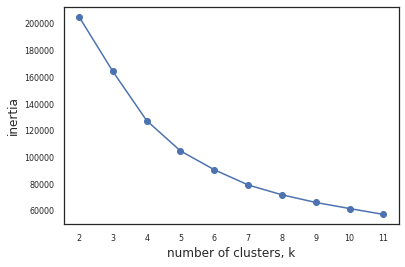

In [98]:
ks = range(2, 12)
inertias = []

for k in ks:
    scaler = StandardScaler()
    model = KMeans(n_clusters=k)
    pipeline = make_pipeline(scaler, model)
    pipeline.fit(X)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k', fontsize=12)
plt.ylabel('inertia', fontsize=12)
plt.xticks(ks, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [99]:
#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
#import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
  scaler = StandardScaler()
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  pipeline = make_pipeline(scaler, clusterer)
  cluster_labels = pipeline.fit_predict(X)
  
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.17311315324168441
For n_clusters = 3 The average silhouette_score is : 0.14822944884525965
For n_clusters = 4 The average silhouette_score is : 0.14396647210691774
For n_clusters = 5 The average silhouette_score is : 0.0473720220801048
For n_clusters = 6 The average silhouette_score is : 0.03006801997691503
For n_clusters = 7 The average silhouette_score is : 0.014244224342148499
For n_clusters = 8 The average silhouette_score is : -0.02056448693069904
For n_clusters = 9 The average silhouette_score is : -0.043217140548756326
For n_clusters = 10 The average silhouette_score is : -0.07477499842966097


#### Best Model

To create this the 4 clusters, we apply the KMeans pipeline to our data and saver our results to 'labels'.

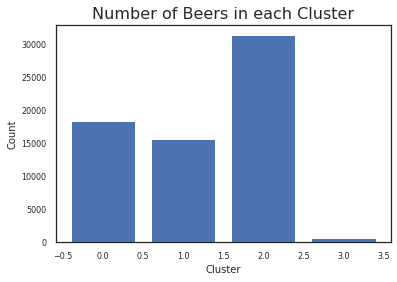

In [100]:
scaler = StandardScaler()
model = KMeans(n_clusters=4, random_state=443)
pipeline = make_pipeline(scaler, model)

pipeline.fit(X)

labels = pipeline.predict(X)


unique, frequency = np.unique(labels, return_counts = True) 

#print(unique)
#print(frequency)

plt.bar(unique, frequency)
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Number of Beers in each Cluster', fontsize=16)

plt.show()

In [101]:
print(unique)
print(frequency)

[0 1 2 3]
[18415 15627 31346   657]


#### EDA of Model

Below we do some light touch EDA to understand the performance of each cluster across:
* Number of Reviews
* Mean Score
* Mean Standard Deviation of Score
* Average Recency of Last Review

This shows us that clusters 3 is the ideal target group but only contains 657 beers are part of this cluster. Cluster 2 may also be of interest as this has a high average score and consists of a large number of beers - however, these beers don't seem to have a large number of reviews on average which does not meet one of the criteria handed down by Brewery management.

Before deciding to continue with this model or not, we will apply another cluster model to see if this performs better.


In [103]:
beer_cluster = beer
beer_cluster['cluster'] = labels

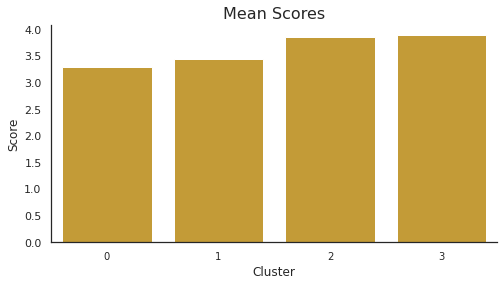

In [104]:
_ = plt.figure(figsize=(8, 4))
_ = sns.barplot(data=beer_cluster, x='cluster', y='mean_score', color='goldenrod', ci=None)
_ = sns.despine()

_ = plt.title('Mean Scores', fontsize=16)
_ = plt.xlabel('Cluster', fontsize=12)
_ = plt.xticks(rotation=0, fontsize=10)
_ = plt.ylabel('Score', fontsize=12)
#_ = plt.ylim(0,5)

plt.show()

In [105]:
beer_cluster.groupby(by='cluster')['mean_score'].mean()

cluster
0    3.294511
1    3.450339
2    3.853782
3    3.888517
Name: mean_score, dtype: float64

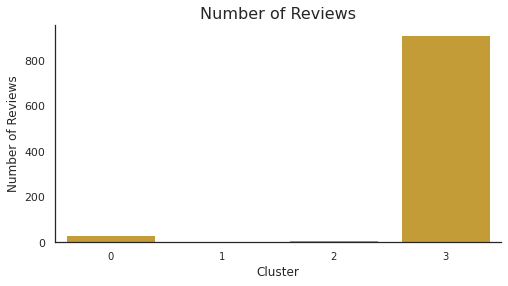

In [106]:
_ = plt.figure(figsize=(8, 4))
_ = sns.barplot(data=beer_cluster, x='cluster', y='number_reviews', color='goldenrod', ci=None)
_ = sns.despine()

_ = plt.title('Number of Reviews', fontsize=16)
_ = plt.xlabel('Cluster', fontsize=12)
_ = plt.xticks(rotation=0, fontsize=10)
_ = plt.ylabel('Number of Reviews', fontsize=12)
#_ = plt.ylim(0,5)

plt.show()

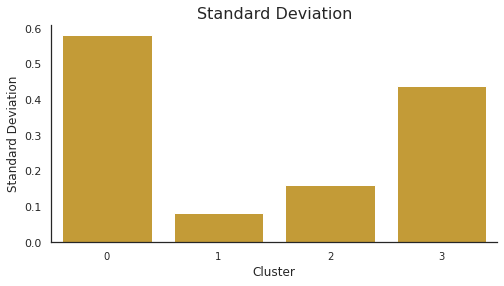

In [107]:
_ = plt.figure(figsize=(8, 4))
_ = sns.barplot(data=beer_cluster, x='cluster', y='std_score', color='goldenrod', ci=None)
_ = sns.despine()

_ = plt.title('Standard Deviation', fontsize=16)
_ = plt.xlabel('Cluster', fontsize=12)
_ = plt.xticks(rotation=0, fontsize=10)
_ = plt.ylabel('Standard Deviation', fontsize=12)
#_ = plt.ylim(0,5)

plt.show()

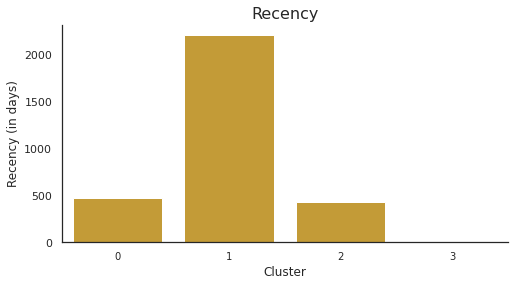

In [108]:
_ = plt.figure(figsize=(8, 4))
_ = sns.barplot(data=beer_cluster, x='cluster', y='recency_review', color='goldenrod', ci=None)
_ = sns.despine()

_ = plt.title('Recency', fontsize=16)
_ = plt.xlabel('Cluster', fontsize=12)
_ = plt.xticks(rotation=0, fontsize=10)
_ = plt.ylabel('Recency (in days)', fontsize=12)
#_ = plt.ylim(0,5)

plt.show()

In [109]:
print('Count of Beers: ', round(beer_cluster[beer_cluster.cluster == 3]['mean_score'].count(), 2))
print('Average number of reviews: ', round(beer_cluster[beer_cluster.cluster == 3]['number_reviews'].mean(), 2))
print('Average score: ', round(beer_cluster[beer_cluster.cluster == 3]['mean_score'].mean(), 2))
print('Average deviation: ', round(beer_cluster[beer_cluster.cluster == 3]['std_score'].mean(), 2))
print('Average days since last review: ', round(beer_cluster[beer_cluster.cluster == 3]['recency_review'].mean(), 2))

Count of Beers:  657
Average number of reviews:  911.51
Average score:  3.89
Average deviation:  0.44
Average days since last review:  7.11


In [110]:
#beer_cluster[beer_cluster.cluster == 3].describe()

In [111]:
#beer_cluster.describe()

### Segmentation 2

The last clustering didn't work as well as hoped shown by the performance on the Elbow and Silhouette methods. To see if we can imporve performance, we will reducing the clustering to only include:
1. Number of Reviews
2. Average Review Score
3. Recency of Last Review

The decision to drop Standard Deviation as a metric was based on the fact that ther is quite a large number of rows that have only 1 review and therefore a Standard Deviation of 0. This means that including both the number of reviews and Standard Deviation in the clustering may be impacting performance.

#### Transform data & find optimal k

First, we change the X dataset to include the three metrics mentioned in the last section.

Following this, we apply the Elbow and Silhouette methods to the data. The results this time around are much more promising.
* The Elbow method shows a distinct inflection at the k=4
* Silhouette method shows strong results for k of 2, 3 and 4 (although not as strong as 2 and 3)

In [112]:
X = beer[['number_reviews', 'mean_score', 'recency_review']]

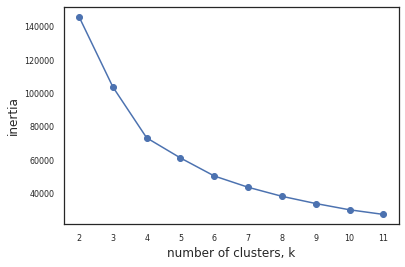

In [113]:
ks = range(2, 12)
inertias = []

for k in ks:
    scaler = StandardScaler()
    model = KMeans(n_clusters=k, random_state=62)
    pipeline = make_pipeline(scaler, model)
    pipeline.fit(X)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k', fontsize=12)
plt.ylabel('inertia', fontsize=12)
plt.xticks(ks, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [114]:
#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
#import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
  scaler = StandardScaler()
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  pipeline = make_pipeline(scaler, clusterer)
  cluster_labels = pipeline.fit_predict(X)
  
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6648459367781493
For n_clusters = 3 The average silhouette_score is : 0.5620932343780378
For n_clusters = 4 The average silhouette_score is : 0.2810971879493778
For n_clusters = 5 The average silhouette_score is : 0.17777389008979977
For n_clusters = 6 The average silhouette_score is : 0.043840633447581885
For n_clusters = 7 The average silhouette_score is : -0.015724740986559283
For n_clusters = 8 The average silhouette_score is : 0.04222192579909681
For n_clusters = 9 The average silhouette_score is : 0.033129775210864125
For n_clusters = 10 The average silhouette_score is : 0.006821350255583143


#### Optimal Model

After analysing the label results across clusters with 2, 3, and 4 - it was shown that k=4 was the most informative as it provided a clearer seperation of the data into understandable groups. With this in mind, we focused our attention on applying the KMeans model with k=4 and using this to predict labels for our dataset.

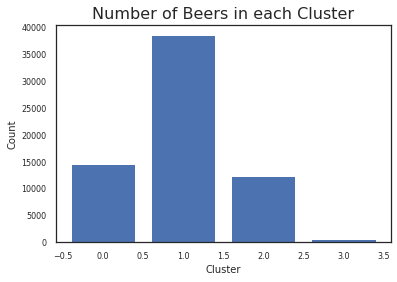

In [115]:
scaler = StandardScaler()
model = KMeans(n_clusters=4, random_state=443)
pipeline = make_pipeline(scaler, model)

pipeline.fit(X)

labels = pipeline.predict(X)


unique, frequency = np.unique(labels, return_counts = True) 

#print(unique)
#print(frequency)

plt.bar(unique, frequency)
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Number of Beers in each Cluster', fontsize=16)

plt.show()

In [116]:
print(unique)
print(frequency)

[0 1 2 3]
[14487 38537 12394   627]


In [117]:
beer_cluster = beer
beer_cluster['cluster'] = labels

#### Cluster EDA



With the clusters created, we will do some light touch EDA here in our workbook with majority of this work being down in Tableau (in link below):

https://public.tableau.com/profile/rory.breslin#!/vizhome/CraftBeerDataset-ReviewsSummarywithClusters/BeerLevelSummary 

The results show that cluster 3 is likely the cluster of most interest due to it's high average score and large number of reviews - the only issue being is that it only represents 627 beers in our dataset.

On further review of our dataset, we conclude that it is a mix of cluster 1 and cluster 3 which we would like to use as are target, with certain filters applied:
* Beer must be in the 75th percentile in average score (above 3.98)
* Beer must be in the 75th percentile in number of reviews (above 34)

Applying these two filters alieviates concerns that including the two cluster would bring to the quality or the scale the brewery is looking to achieve with it's new beer.

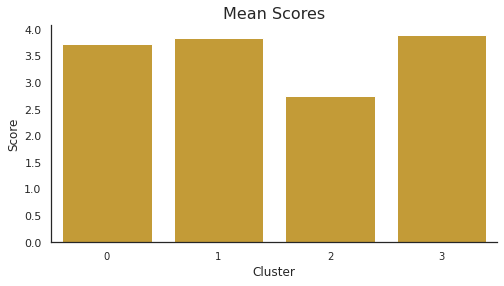

cluster
0    3.720939
1    3.831251
2    2.739497
3    3.889613
Name: mean_score, dtype: float64

In [118]:
_ = plt.figure(figsize=(8, 4))
_ = sns.barplot(data=beer_cluster, x='cluster', y='mean_score', color='goldenrod', ci=None)
_ = sns.despine()

_ = plt.title('Mean Scores', fontsize=16)
_ = plt.xlabel('Cluster', fontsize=12)
_ = plt.xticks(rotation=0, fontsize=10)
_ = plt.ylabel('Score', fontsize=12)
#_ = plt.ylim(0,5)

plt.show()


beer_cluster.groupby(by='cluster')['mean_score'].mean()

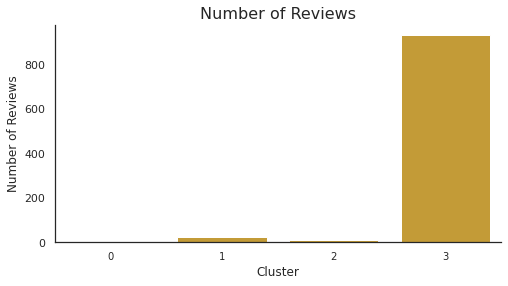

In [119]:
_ = plt.figure(figsize=(8, 4))
_ = sns.barplot(data=beer_cluster, x='cluster', y='number_reviews', color='goldenrod', ci=None)
_ = sns.despine()

_ = plt.title('Number of Reviews', fontsize=16)
_ = plt.xlabel('Cluster', fontsize=12)
_ = plt.xticks(rotation=0, fontsize=10)
_ = plt.ylabel('Number of Reviews', fontsize=12)
#_ = plt.ylim(0,5)

plt.show()

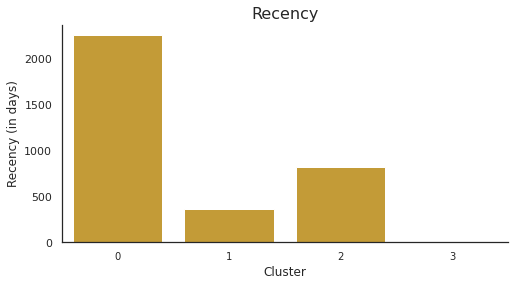

In [120]:
_ = plt.figure(figsize=(8, 4))
_ = sns.barplot(data=beer_cluster, x='cluster', y='recency_review', color='goldenrod', ci=None)
_ = sns.despine()

_ = plt.title('Recency', fontsize=16)
_ = plt.xlabel('Cluster', fontsize=12)
_ = plt.xticks(rotation=0, fontsize=10)
_ = plt.ylabel('Recency (in days)', fontsize=12)
#_ = plt.ylim(0,5)

plt.show()

In [121]:
print('Count of Beers: ', round(beer_cluster[beer_cluster.cluster == 3]['mean_score'].count(), 2))
print('Average number of reviews: ', round(beer_cluster[beer_cluster.cluster == 3]['number_reviews'].mean(), 2))
print('Average score: ', round(beer_cluster[beer_cluster.cluster == 3]['mean_score'].mean(), 2))
print('Average deviation: ', round(beer_cluster[beer_cluster.cluster == 3]['std_score'].mean(), 2))
print('Average days since last review: ', round(beer_cluster[beer_cluster.cluster == 3]['recency_review'].mean(), 2))

Count of Beers:  627
Average number of reviews:  932.59
Average score:  3.89
Average deviation:  0.44
Average days since last review:  6.89


In [122]:
print('Count of Beers: ', round(beer_cluster[beer_cluster.cluster == 1]['mean_score'].count(), 2))
print('Average number of reviews: ', round(beer_cluster[beer_cluster.cluster == 1]['number_reviews'].mean(), 2))
print('Average score: ', round(beer_cluster[beer_cluster.cluster == 1]['mean_score'].mean(), 2))
print('Average deviation: ', round(beer_cluster[beer_cluster.cluster == 1]['std_score'].mean(), 2))
print('Average days since last review: ', round(beer_cluster[beer_cluster.cluster == 1]['recency_review'].mean(), 2))

Count of Beers:  38537
Average number of reviews:  22.09
Average score:  3.83
Average deviation:  0.28
Average days since last review:  361.4


In [123]:
#beer_cluster[beer_cluster.cluster == 3].describe()

#### Output Tableau Analysis

In [124]:
beer_cluster.to_csv('beers_eda_tableau.csv')

### Target Cluster

As mentioned in the last section, we are going to focus on clusters 1 and 3 in our dataset but the brewery are looking for us to revise these to ensure that all target beers are in the 75th percentile for quality (average beer score) and volume (number of reviews).

To achieve this, we will create a new column named 'cluster_target' with these filters factored in. Applying the filter leaves us with a target set of 3,851 (or 5.8% of the dataset). 

In [125]:
print('Number of Reviews (75th percentile): ',  beer.number_reviews.quantile(0.75))
print('Average Review Score (75th percentile): ',  beer.mean_score.quantile(0.75))

Number of Reviews (75th percentile):  7.0
Average Review Score (75th percentile):  3.98


In [126]:
beer_cluster['cluster_target'] = np.where( ((beer_cluster.cluster == 1 ) | (beer_cluster.cluster == 3))  &  (beer_cluster.number_reviews >= beer.number_reviews.quantile(0.75))  &  (beer_cluster.mean_score >= beer.mean_score.quantile(0.75)), 1, 0)

In [127]:
beer_cluster.cluster_target.value_counts()

0    62194
1     3851
Name: cluster_target, dtype: int64

In [128]:
beer_cluster.cluster_target.value_counts(normalize=True)

0    0.941691
1    0.058309
Name: cluster_target, dtype: float64

## Beer-level EDA

As mentioned earlier, the majority of the EDA was done in Tableau and this is available at the link below.

https://public.tableau.com/profile/rory.breslin#!/vizhome/CraftBeerDataset-ReviewsSummarywithClusters/BeerLevelSummary 

In the coming sections, we will look at some additional EDA that it easier in Python.

### Correlation

We apply the correlation matrix again to see how the correlation have changed now that we have brought the data up to beer-level and change the focus of our analysis to our target group.

The matrix shows that Beer ABV is still positively correlated but that the previous trend with Brewery Type (i.e. Bar or Eatery) seems to be weaker.

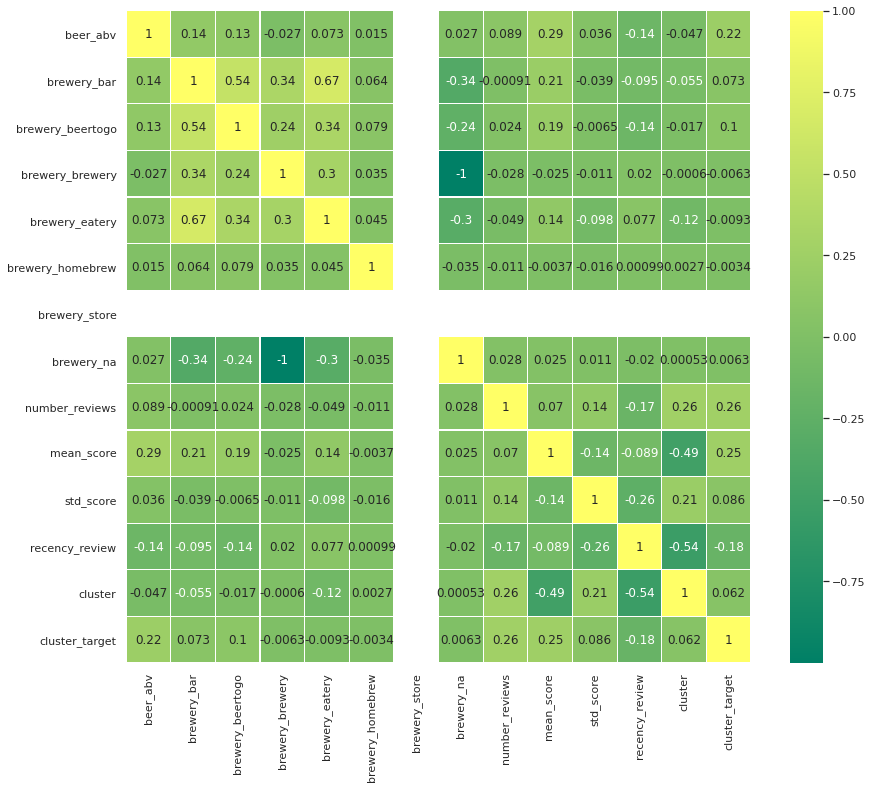

In [129]:
_ = plt.figure(figsize=(14, 12))
_ = sns.heatmap(beer_cluster.corr(), linewidth=.1, cmap='summer', annot=True)

plt.show()

### Permutation Test - Target vs Beer ABV

Again, we will apply a permutation test to our data to see if the relationship between our target group and Beer ABV is statistically significant - this time at a beer-level.

We achieve the same result as when we applied on review data with a p-value of 0.0. This again suggest we can reject the null hypothesis that Beer ABV is not correlated with our target cluster.

In [131]:
r_obs = pearson_r(beer_cluster['cluster_target'], beer_cluster['beer_abv'])
print(r_obs)

0.22225691193113217


In [132]:
perm_replicates = np.empty(1000)

# Draw replicates
for i in range(1000):
    abv_permuted = np.random.permutation(beer_cluster['beer_abv'])

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(beer_cluster['cluster_target'], abv_permuted)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


##Output Data

In [133]:
beer_cluster.to_csv('beers_eda.csv')